<a href="https://colab.research.google.com/github/vhppacheco/Analise-Ibovespa/blob/main/S%C3%A9rie_Hist%C3%B3rica_Ibovespa_An%C3%A1lise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from pandas_datareader import data as wb
import warnings
warnings.filterwarnings('ignore')

## Série histórica Ibovespa - Pontuação  - Yahoo Finance

In [2]:
TickerA='^BVSP'
df_ibov= wb.DataReader(TickerA, data_source='yahoo', start='2002-1-1', end = '2020-12-31')['Adj Close']
df_ibov= pd.DataFrame(df_ibov)
df_ibov

,Adj Close
Date,
2002-01-02,13872.0
2002-01-03,14265.0
2002-01-04,14332.0
2002-01-07,14379.0
2002-01-08,14168.0
...,...
2020-12-22,116348.0
2020-12-23,117857.0
2020-12-28,119051.0


## Cálculo do Retorno do Ibovespa

In [3]:
df_ibov['simp_return'] = df_ibov['Adj Close'].pct_change()
df_ibov['simp_ret_cum'] = (df_ibov['simp_return'] + 1).cumprod()-1
df_ibov = df_ibov.dropna()
df_ibov

,Adj Close,simp_return,simp_ret_cum
Date,,,
2002-01-03,14265.0,0.028330,0.028330
2002-01-04,14332.0,0.004697,0.033160
2002-01-07,14379.0,0.003279,0.036548
2002-01-08,14168.0,-0.014674,0.021338
2002-01-09,14021.0,-0.010375,0.010741
...,...,...,...
2020-12-22,116348.0,0.002862,7.387255
2020-12-23,117857.0,0.012970,7.496035
2020-12-28,119051.0,0.010131,7.582108


In [4]:
df_ibov_descending = df_ibov.sort_values(by=['simp_return'], ascending=False)
df_ibov_descending

,Adj Close,simp_return,simp_ret_cum
Date,,,
2008-10-13,40829.0,0.146560,1.943267
2020-03-13,82678.0,0.139082,4.960063
2008-10-28,33387.0,0.134262,1.406791
2020-03-24,69729.0,0.096885,4.026600
2008-09-19,53055.0,0.095657,2.824611
...,...,...,...
2020-03-18,66895.0,-0.103488,3.822304
2008-10-15,36833.0,-0.113931,1.655205
2020-03-09,86067.0,-0.121738,5.204369


In [5]:
df_ibov = df_ibov.rename(columns={"Adj Close": "Pontuação Ibov", "simp_return": "Retorno Ibov", "simp_ret_cum": "Retorno Acumulado Ibov"})

In [6]:
df_ibov.to_excel('Retornos Ibov.xlsx')

### Plotando Pontuação, Média Móvel Simples (MMS) e Retornos (Série Histórica em Plotly)

In [7]:

fig = make_subplots(rows=3, cols=1)
 
fig.append_trace(go.Scatter(name = "Pontuação Ibov",
    y=df_ibov['Pontuação Ibov'],
    x=df_ibov.index,
), row=1, col=1)

fig.add_trace(go.Scatter(x=df_ibov.index, y=df_ibov['Pontuação Ibov'].rolling(45).mean(),
                    name="Média Móvel Ibovespa (45 dias)")) 

fig.add_trace(go.Scatter(x=df_ibov.index, y=df_ibov['Pontuação Ibov'].rolling(200).mean(),
                    name="Média Móvel Ibovespa (200 dias)"))
 
fig.append_trace(go.Scatter(name = "Retorno Diário Ibov",
    y=round(df_ibov['Retorno Ibov']*100,2),
    x=df_ibov.index,
), row=2, col=1)
 
fig.append_trace(go.Scatter(name = "Retorno Acumulado Ibov",
    y=round(df_ibov['Retorno Acumulado Ibov']*100,2),
    x=df_ibov.index,
), row=3, col=1)
 
 
fig.update_layout(height=1000, width=1200, title_text="Série Histórica Ibovespa")
fig.show()

Inserindo as MMS na base

In [8]:
df_ibov['MMS 45'] = df_ibov['Pontuação Ibov'].rolling(45).mean()
df_ibov['MMS 200'] = df_ibov['Pontuação Ibov'].rolling(200).mean()
df_ibov

,Pontuação Ibov,Retorno Ibov,Retorno Acumulado Ibov,MMS 45,MMS 200
Date,,,,,
2002-01-03,14265.0,0.028330,0.028330,NaN,NaN
2002-01-04,14332.0,0.004697,0.033160,NaN,NaN
2002-01-07,14379.0,0.003279,0.036548,NaN,NaN
2002-01-08,14168.0,-0.014674,0.021338,NaN,NaN
2002-01-09,14021.0,-0.010375,0.010741,NaN,NaN
...,...,...,...,...,...
2020-12-22,116348.0,0.002862,7.387255,107240.133333,94821.445
2020-12-23,117857.0,0.012970,7.496035,107666.777778,94920.745
2020-12-28,119051.0,0.010131,7.582108,108078.133333,95085.665


### Gráfico de Calor com os Retornos do Ibovespa (Anual e Mensal)

In [9]:
pip install monthly-returns-heatmap

  Created wheel for monthly-returns-heatmap: filename=monthly_returns_heatmap-0.0.11-cp36-none-any.whl size=8102 sha256=998a9d6439564b2de125badb5ee25f3cb8a3849c563c744a04f301ca1580b47b
  Stored in directory: /root/.cache/pip/wheels/98/e6/a6/5e8e316bb2ddc8bf692b75d63c5db9208d82aaecacb1e1ff72
Successfully built monthly-returns-heatmap


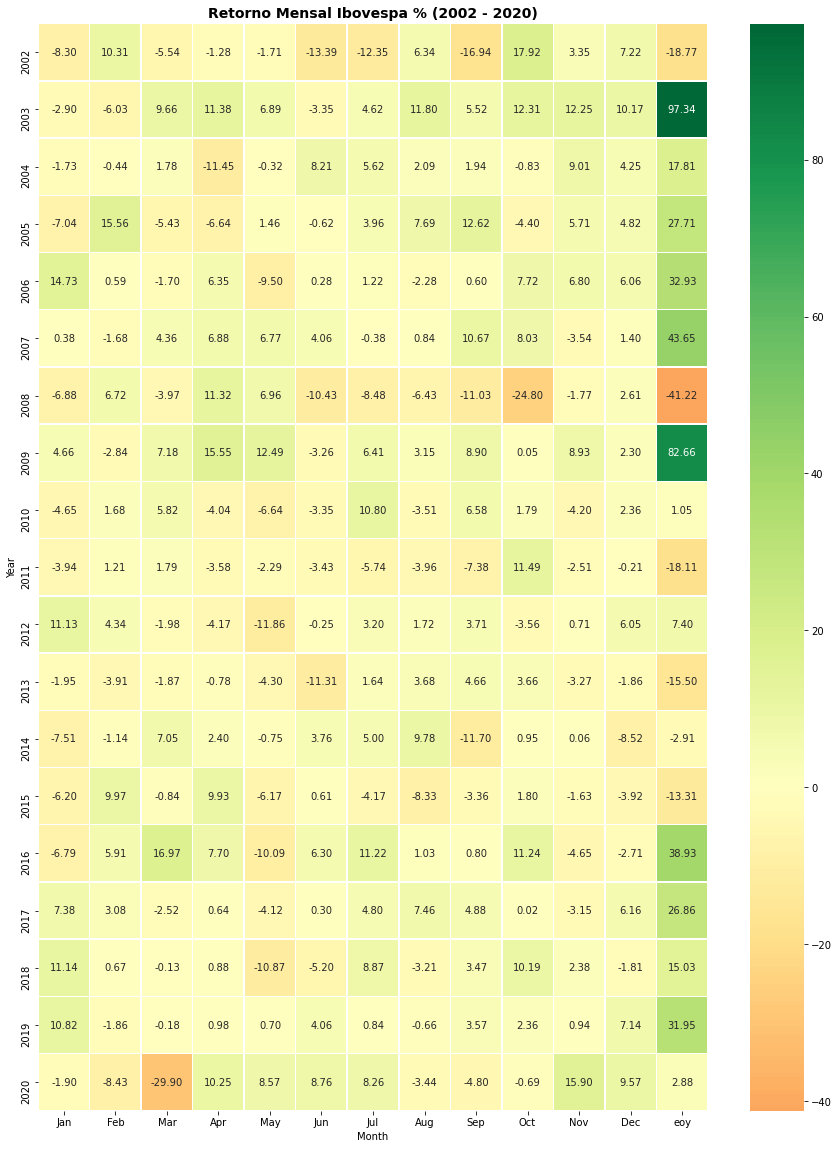

In [10]:
import monthly_returns_heatmap as mrh
retorno = df_ibov['Retorno Ibov']
mrh.plot(retorno,figsize= (15,20), title = 'Retorno Mensal Ibovespa % (2002 - 2020)', eoy = True)

## Retorno Acumulado por Mês

In [11]:
retorno_mes1 = retorno.groupby(retorno.index.month).sum()*100
retorno_mes1

Date
1      1.288014
2     35.298530
3      4.120949
4     51.736759
5    -23.650360
6    -16.943828
7     45.492228
8     26.413457
9     12.980987
10    58.149732
11    43.410811
12    51.885909
Name: Retorno Ibov, dtype: float64

In [12]:
retorno_mes = retorno.groupby(retorno.index.month_name()).sum()*100
retorno_mes = pd.DataFrame(retorno_mes).sort_values(by='Retorno Ibov', ascending = False)
retorno_mes

,Retorno Ibov
Date,
October,58.149732
December,51.885909
April,51.736759
July,45.492228
November,43.410811
February,35.298530
August,26.413457
September,12.980987
March,4.120949


In [13]:
y = round(retorno_mes1,2)
x = ['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro']

color = np.where(y<0, 'red', 'green')

fig = go.Figure(data=[go.Bar(x = x,
             y=y,
            text=y,
            textposition='auto',
            marker_color = color
        )])
fig.update_layout(title_text='Retorno Acumulado Ibovespa por mês (%)')
fig.show()

## Retorno Médio por Mês

In [14]:
anos = 2020 -2002

In [15]:
retorno_medio1 = retorno.groupby(retorno.index.month).sum()/anos
retorno_medio1*100

Date
1     0.071556
2     1.961029
3     0.228942
4     2.874264
5    -1.313909
6    -0.941324
7     2.527346
8     1.467414
9     0.721166
10    3.230541
11    2.411712
12    2.882550
Name: Retorno Ibov, dtype: float64

In [16]:
retorno_medio = retorno.groupby(retorno.index.month_name()).sum()/anos
retorno_medio = pd.DataFrame(retorno_medio).sort_values(by='Retorno Ibov', ascending = False)
retorno_medio*100

,Retorno Ibov
Date,
October,3.230541
December,2.882550
April,2.874264
July,2.527346
November,2.411712
February,1.961029
August,1.467414
September,0.721166
March,0.228942


In [17]:
y = round(retorno_medio1*100,2)
x = ['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro']

color = np.where(y<0, 'red', 'green')

fig = go.Figure(data=[go.Bar(x = x,
            y=y,
            text=y,
            textposition='auto',
            marker_color = color
        )])
fig.update_layout(title_text='Retorno Médio Ibovespa por mês (%)')
fig.show()

# Aprofundando a Análise - Probabilidades

### Distribuição Normal do Ibovespa

In [53]:
x = df_ibov['Retorno Ibov'].dropna()
hist_data = [x]
group_labels = ['Normal']

fig = ff.create_distplot(hist_data, group_labels, bin_size=.0005)
fig.update_layout(title_text='Distribuição Normal dos Retornos do Ibov')
fig.show()

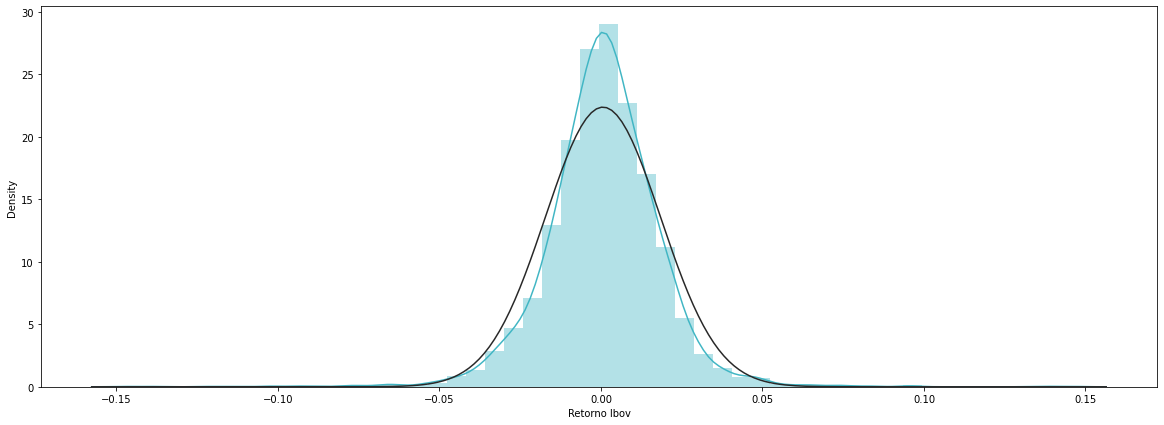

In [57]:
plt.figure(figsize=(20, 7))
sns.distplot(df_ibov['Retorno Ibov'], fit=norm, color='#41b6c4')

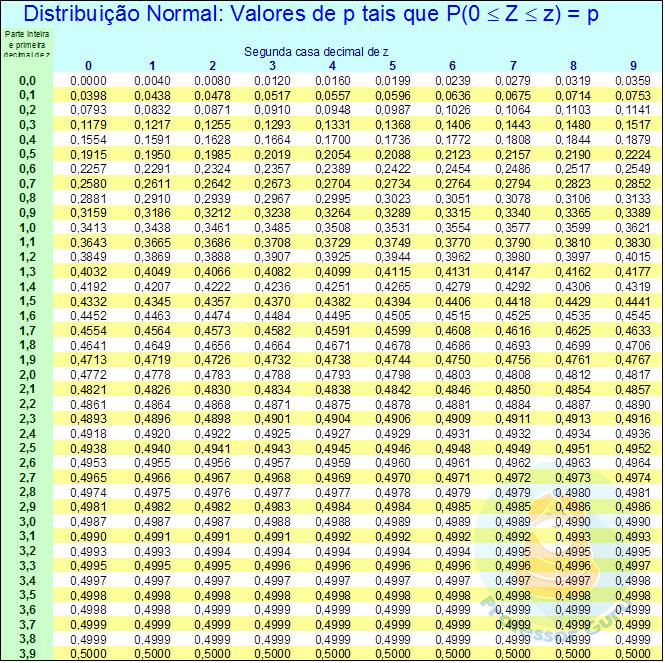

Para valores de p < 0,05 a normalidade é rejeitada.

In [37]:
from scipy.stats import normaltest, stats

In [34]:
teste_norm = stats.normaltest(df_ibov['Retorno Ibov'])
teste_norm

NormaltestResult(statistic=699.4000815332445, pvalue=1.3402998645900517e-152)

A **distribuição normal** foi desenhada de acordo com a média e o desvio padrão das
observações utilizadas e foi **desenhado de preto**.
Podemos notar algumas diferenças entre elas. A primeira é que a distribuição
encontrada é mais consistente próxima a média que a distribuição normal. Portanto, assume um formato mais fino no meio e alcança uma altura maior.
O segundo ponto a ser destacado, e esse é o de maior interesse na análise é a
**presença de outliers**, observações que fujam muito ao padrão. Como podemos ver, a distribuição normal atribui probabilidade praticamente nula para eventos extremos. 
A partir de determinado ponto a esquerda ou a direita, a probabilidade de que grandes eventos aconteçam se mostra praticamente nula. Porém, na **distribuição histórica**, vemos que existem eventos de grande intensidade.
Ou seja, ao contrário do que prevê uma distribuição normal, a distribuição
histórica mostra que existem eventos de grande intensidade, tanto positivos quanto negativos que ocorrem com certa frequência. Ainda que sejam raros, a probabilidade de tais eventos ocorrerem não pode ser descartada. 

### Entropia da série para se verifcar evidências de comportamento determinístico